# 1- This code receives the data directly from the camera and after analyzing them, plots them.

# 2- And then it takes a photo using the camera sensor and saves it in jpg format.

# 3- Then it does a vertical binning with bin value 1 (it means every vertical pixels) and plot a histogram.

# 4- It draw a contour plot to show the intensity.


Image shape: (3036, 4024)


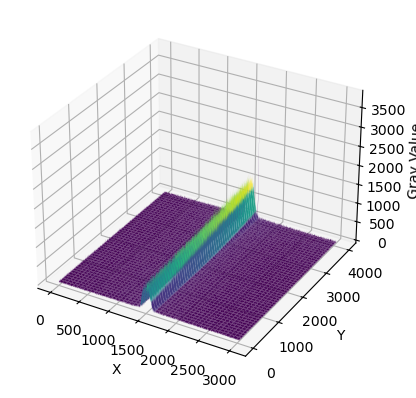

In [ ]:
from pypylon import pylon
#STEP1
#Taking Picture with modifiable Gain Value, Exposure Time and Pixel Format.

camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()
camera.PixelFormat.SetValue("Mono12")
camera.ExposureTime.SetValue(30000.0)
camera.Gain.SetValue(27.0)
numberOfImagesToGrab = 1
camera.StartGrabbingMax(numberOfImagesToGrab)

#Defining 3D values x, y, img[x,y]

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
    if grabResult.GrabSucceeded():
        img = grabResult.Array
        width, height = img.shape
        print("Image shape:", img.shape)
        for x in range(width):
            for y in range(height):
                gray_value = img[x, y]
        grabResult.Release()
camera.Close()

#Plotting

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
img_transposed = img.T
X, Y = np.meshgrid(np.arange(img_transposed.shape[1]), np.arange(img_transposed.shape[0]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, img_transposed, cmap='viridis')  # You can choose any colormap you like
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Gray Value')
plt.show()


In [ ]:
#STEP2
ipo = pylon.ImagePersistenceOptions()
quality = 90 * 10
ipo.SetQuality(quality)
filename = f"saved_pypylon_img_{quality}.jpeg"
from PIL import Image
import numpy as np
image_pil = Image.fromarray(np.uint8(img))
output_filename = "saved_pypylon.jpg"
image_pil.save(output_filename, format="JPEG", quality=90)
print(f"Image saved as {output_filename}")

Image saved as saved_pypylon_10angle.jpg


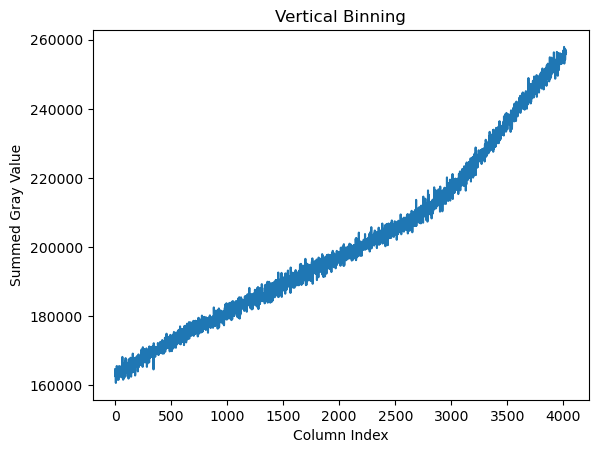

In [ ]:
#STEP3
import numpy as np
import matplotlib.pyplot as plt

# Assuming img is your image array
# Perform vertical binning by summing along the vertical axis (axis=0)
vertical_binning = np.sum(img, axis=0)

# Plot the result
plt.figure()
plt.plot(vertical_binning)
plt.xlabel('Column Index')
plt.ylabel('Summed Gray Value')
plt.title('Vertical Binning')
plt.show()


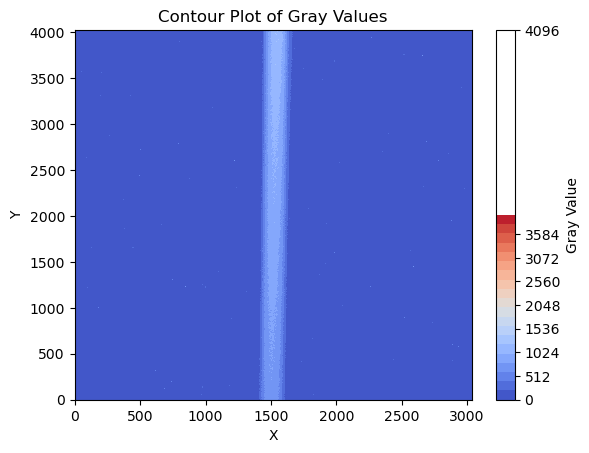

In [ ]:
#STEP4
import numpy as np
import matplotlib.pyplot as plt
img_transposed = img.T
X, Y = np.meshgrid(np.arange(img_transposed.shape[1]), np.arange(img_transposed.shape[0]))
plt.contourf(X, Y, img_transposed, levels=20, cmap='coolwarm')  # Adjust 'levels' as needed
cbar = plt.colorbar(label='Gray Value')
cbar.set_ticks(np.linspace(0, 4096, 9))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Gray Values')
plt.show()